<a href="https://colab.research.google.com/github/rajanm/END2_0_Session_5/blob/main/Stanford_Sentiment_Analysis_using_LSTM_RNN_Multiple_Augmentation_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup ###

Your first step to deep learning in NLP. We will be mostly using PyTorch. Just like torchvision, PyTorch provides an official library, torchtext, for handling text-processing pipelines. 

We will be using previous session tweet dataset. Let's just preview the dataset.

In [4]:
!nvidia-smi

Tue Jun  8 14:09:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import pandas as pd

In [6]:
!ls -alh

total 24M
drwxr-xr-x 1 root root 4.0K Jun  8 14:09 .
drwxr-xr-x 1 root root 4.0K Jun  8 14:04 ..
drwxr-xr-x 4 root root 4.0K Jun  1 13:40 .config
-rw-r--r-- 1 root root 3.7M Jun  8 14:07 input_dataset_aug_synonym.csv
-rw-r--r-- 1 root root 3.6M Jun  8 14:07 input_dataset.csv
-rw-r--r-- 1 root root 3.6M Jun  8 14:07 input_dataset_random_spell.csv
-rw-r--r-- 1 root root 3.3M Jun  8 14:07 input_dataset_random_word_del.csv
-rw-r--r-- 1 root root 3.6M Jun  8 14:07 input_dataset_random_word_swap.csv
drwxr-xr-x 2 root root 4.0K Jun  8 14:09 .ipynb_checkpoints
drwxrwxr-x 3 root root 4.0K Oct  9  2013 __MACOSX
drwxr-xr-x 1 root root 4.0K Jun  1 13:40 sample_data
drwxr-xr-x 2 root root 4.0K Jun  8 14:09 stanfordSentimentTreebank
-rw-r--r-- 1 root root 6.1M Oct  9  2013 stanfordSentimentTreebank.zip


In [7]:
TEXT_COL, LABEL_COL = 'text', 'label'
DATASET_DIR = "/content/"

In [8]:
!pip install nlpaug
!pip install swifter
!pip install gdown

In [9]:
!pip install hydra-core omegaconf

### Data Downloads ###

Download and extract the Stanford reviews data.

In [10]:
#download the stanford dataset to local storage for processing
!wget http://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip

--2021-06-08 14:10:03--  http://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip [following]
--2021-06-08 14:10:03--  https://nlp.stanford.edu/~socherr/stanfordSentimentTreebank.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6372817 (6.1M) [application/zip]
Saving to: ‘stanfordSentimentTreebank.zip.1’

stanfordSentimentTr 100%[===================>]   6.08M  25.1MB/s    in 0.2s    

2021-06-08 14:10:04 (25.1 MB/s) - ‘stanfordSentimentTreebank.zip.1’ saved [6372817/6372817]



In [11]:
!unzip -o stanfordSentimentTreebank.zip

Archive:  stanfordSentimentTreebank.zip
  inflating: stanfordSentimentTreebank/datasetSentences.txt  
  inflating: __MACOSX/stanfordSentimentTreebank/._datasetSentences.txt  
  inflating: stanfordSentimentTreebank/datasetSplit.txt  
  inflating: __MACOSX/stanfordSentimentTreebank/._datasetSplit.txt  
  inflating: stanfordSentimentTreebank/dictionary.txt  
  inflating: __MACOSX/stanfordSentimentTreebank/._dictionary.txt  
  inflating: stanfordSentimentTreebank/original_rt_snippets.txt  
  inflating: __MACOSX/stanfordSentimentTreebank/._original_rt_snippets.txt  
  inflating: stanfordSentimentTreebank/README.txt  
  inflating: __MACOSX/stanfordSentimentTreebank/._README.txt  
  inflating: stanfordSentimentTreebank/sentiment_labels.txt  
  inflating: __MACOSX/stanfordSentimentTreebank/._sentiment_labels.txt  
  inflating: stanfordSentimentTreebank/SOStr.txt  
  inflating: stanfordSentimentTreebank/STree.txt  


In [12]:
!ls -alh
!ls -alh stanfordSentimentTreebank/

total 30M
drwxr-xr-x 1 root root 4.0K Jun  8 14:10 .
drwxr-xr-x 1 root root 4.0K Jun  8 14:04 ..
drwxr-xr-x 4 root root 4.0K Jun  1 13:40 .config
-rw-r--r-- 1 root root 3.7M Jun  8 14:07 input_dataset_aug_synonym.csv
-rw-r--r-- 1 root root 3.6M Jun  8 14:07 input_dataset.csv
-rw-r--r-- 1 root root 3.6M Jun  8 14:07 input_dataset_random_spell.csv
-rw-r--r-- 1 root root 3.3M Jun  8 14:07 input_dataset_random_word_del.csv
-rw-r--r-- 1 root root 3.6M Jun  8 14:07 input_dataset_random_word_swap.csv
drwxr-xr-x 2 root root 4.0K Jun  8 14:09 .ipynb_checkpoints
drwxrwxr-x 3 root root 4.0K Oct  9  2013 __MACOSX
drwxr-xr-x 1 root root 4.0K Jun  1 13:40 sample_data
drwxr-xr-x 2 root root 4.0K Jun  8 14:10 stanfordSentimentTreebank
-rw-r--r-- 1 root root 6.1M Oct  9  2013 stanfordSentimentTreebank.zip
-rw-r--r-- 1 root root 6.1M Oct  9  2013 stanfordSentimentTreebank.zip.1
total 20M
drwxr-xr-x 2 root root 4.0K Jun  8 14:10 .
drwxr-xr-x 1 root root 4.0K Jun  8 14:10 ..
-rwxr-xr-x 1 root root 1.3M Oc

### Data Transformation and Augmentation ###

Combine the various datasets from Stanford to merge the sentences with sentiment values. Next, augment the dataset with the following -


* synonym
* random word swap
* random word delete
* back translation


In [13]:
#import all libraries required for the notebook
import os
import pandas as pd

#import nlp augumenter library
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from nlpaug.util import Action
import swifter

from tqdm.auto import tqdm
tqdm.pandas()

In [14]:
#set data directory
data_dir = 'stanfordSentimentTreebank'

In [15]:
#load sentiment labels
sentiment_labels = pd.read_csv(os.path.join(data_dir, "sentiment_labels.txt"), names=['phrase_ids', 'sentiment_values'], sep="|", header=0)

In [16]:
#sample the sentiment labels data - 10 rows
sentiment_labels.head(10)

,phrase_ids,sentiment_values
0,0,0.50000
1,1,0.50000
2,2,0.44444
3,3,0.50000
4,4,0.42708
5,5,0.37500
6,6,0.41667
7,7,0.54167
8,8,0.33333
9,9,0.45833


In [17]:
# function to convert label (sentiment value) to 5 classes
# for very negative, negative, neutral, positive, very positive
def discretize_label(label):
    # very negative
    if label <= 0.2: return 0
    # negative
    if label <= 0.4: return 1
    # neutral
    if label <= 0.6: return 2
    # positive
    if label <= 0.8: return 3
    # very positive
    return 4

In [18]:
sentiment_labels['sentiment_values'] = sentiment_labels['sentiment_values'].progress_apply(discretize_label)

In [19]:
#sample the sentiment labels data - 10 rows - after converting labels to classes
sentiment_labels.head(10)

,phrase_ids,sentiment_values
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2
5,5,1
6,6,2
7,7,2
8,8,1
9,9,2


In [20]:
#load the sentences
sentence_ids = pd.read_csv(os.path.join(data_dir, "datasetSentences.txt"), sep="\t")
sentence_ids.head(10)

,sentence_index,sentence
0,1,The Rock is destined to be the 21st Century 's...
1,2,The gorgeously elaborate continuation of `` Th...
2,3,Effective but too-tepid biopic
3,4,If you sometimes like to go to the movies to h...
4,5,"Emerges as something rare , an issue movie tha..."
5,6,The film provides some great insight into the ...
6,7,Offers that rare combination of entertainment ...
7,8,Perhaps no picture ever made has more literall...
8,9,Steers turns in a snappy screenplay that curls...
9,10,But he somehow pulls it off .


In [21]:
#load the dictionary and sample 10 rows
dictionary = pd.read_csv(os.path.join(data_dir, "dictionary.txt"), sep="|", names=['phrase', 'phrase_ids'])
dictionary.head(10)

,phrase,phrase_ids
0,!,0
1,! ',22935
2,! '',18235
3,! Alas,179257
4,! Brilliant,22936
5,! Brilliant !,40532
6,! Brilliant ! ',22937
7,! C'mon,60624
8,! Gollum 's ` performance ' is incredible,13402
9,"! Oh , look at that clever angle ! Wow , a jum...",179258


In [22]:
#load the train/test data and sample 10 rows
train_test_split = pd.read_csv(os.path.join(data_dir, "datasetSplit.txt"))
train_test_split.head(10)

,sentence_index,splitset_label
0,1,1
1,2,1
2,3,2
3,4,2
4,5,2
5,6,2
6,7,2
7,8,2
8,9,2
9,10,2


In [23]:
sentence_phrase_merge = pd.merge(sentence_ids, dictionary, left_on='sentence', right_on='phrase')
sentence_phrase_split = pd.merge(sentence_phrase_merge, train_test_split, on='sentence_index')
input_dataset = pd.merge(sentence_phrase_split, sentiment_labels, on='phrase_ids')
input_dataset['phrase_cleaned'] = input_dataset['sentence'].str.replace(r"\s('s|'d|'re|'ll|'m|'ve|n't)\b", lambda m: m.group(1))

In [24]:
input_dataset.describe()

,sentence_index,phrase_ids,splitset_label,sentiment_values
count,11286.000000,11286.000000,11286.000000,11286.000000
mean,5910.961102,132003.589846,1.373294,2.059986
std,3422.455572,68214.626430,0.647295,1.287835
min,1.000000,3467.000000,1.000000,0.000000
25%,2951.250000,67402.000000,1.000000,1.000000
50%,5904.500000,144063.500000,1.000000,2.000000
75%,8865.750000,188139.750000,2.000000,3.000000
max,11855.000000,238977.000000,3.000000,4.000000


In [25]:
input_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11286 entries, 0 to 11285
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sentence_index    11286 non-null  int64 
 1   sentence          11286 non-null  object
 2   phrase            11286 non-null  object
 3   phrase_ids        11286 non-null  int64 
 4   splitset_label    11286 non-null  int64 
 5   sentiment_values  11286 non-null  int64 
 6   phrase_cleaned    11286 non-null  object
dtypes: int64(4), object(3)
memory usage: 705.4+ KB


**Merged Data**

In [26]:
input_dataset.head(10)
# input csv created so that it can be manually translated in gsheets
input_dataset.to_csv('input_dataset.csv')

In [27]:
output_dataset = input_dataset.copy()

# this flag is used to decide if the augmented data should be downloaded from gdrive or create.
# each data augmentation step takes 20 mins.
# to save time, the data is augmented once and stored in gdrive.
augment_data_refresh = False
import gdown

**Augment data with random character swap**



In [28]:
if augment_data_refresh == True:
  input_dataset_random_word_swap = input_dataset.copy()
  aug_swap = nac.RandomCharAug(action="swap")
  swap_sentences = input_dataset_random_word_swap['sentence'].progress_apply(aug_swap.augment)
  input_dataset_random_word_swap['sentence'] = swap_sentences
  input_dataset_random_word_swap.to_csv('input_dataset_random_word_swap.csv')
  # manually upload above file to gdrive and set read permission for everyone
else:
  input_dataset_random_word_swap_url = 'https://drive.google.com/uc?id=1KTsTppBMCGn3-MBWHIHCYONe0CGQTuaD'
  input_dataset_random_word_swap_file = 'input_dataset_random_word_swap.csv'
  gdown.download(input_dataset_random_word_swap_url, input_dataset_random_word_swap_file, quiet=False)
  input_dataset_random_word_swap = pd.read_csv(input_dataset_random_word_swap_file, sep=',', header='infer')
input_dataset_random_word_swap.head(10)

Downloading...
From: https://drive.google.com/uc?id=1KTsTppBMCGn3-MBWHIHCYONe0CGQTuaD
To: /content/input_dataset_random_word_swap.csv
3.71MB [00:00, 202MB/s]


,Unnamed: 0,sentence_index,sentence,phrase,phrase_ids,splitset_label,sentiment_values,phrase_cleaned
0,0,1,The Orck is destined to be the 2s1t Ectnury ' ...,The Rock is destined to be the 21st Century 's...,226166,1,3,The Rock is destined to be the 21st Century's ...
1,1,2,The rgogeuosly elbaoarte continuation of ` ` T...,The gorgeously elaborate continuation of `` Th...,226300,1,4,The gorgeously elaborate continuation of `` Th...
2,2,3,Effective but too - tepdi biopic,Effective but too-tepid biopic,13995,2,2,Effective but too-tepid biopic
3,3,4,If you sometimes ilke to go to the omvies to h...,If you sometimes like to go to the movies to h...,14123,2,3,If you sometimes like to go to the movies to h...
4,4,5,"Emerges as something rare, an sisue movie htat...","Emerges as something rare , an issue movie tha...",13999,2,4,"Emerges as something rare , an issue movie tha..."
5,5,6,The film provides some great nisgiht nito the ...,The film provides some great insight into the ...,14498,2,2,The film provides some great insight into the ...
6,6,7,Offers that rare cmobintaino of netetrainemnt ...,Offers that rare combination of entertainment ...,14351,2,4,Offers that rare combination of entertainment ...
7,7,8,Perhaps no picture veer amde has omre iltearll...,Perhaps no picture ever made has more literall...,14371,2,3,Perhaps no picture ever made has more literall...
8,8,9,Seters turns in a snappy sceernplya taht ucrls...,Steers turns in a snappy screenplay that curls...,225968,2,3,Steers turns in a snappy screenplay that curls...
9,9,10,But he osmehwo uplls it off.,But he somehow pulls it off .,222746,2,3,But he somehow pulls it off .


**Augment data with synonyms**

In [29]:
if augment_data_refresh == True:
  input_dataset_aug_synonym = input_dataset.copy()
  aug_synonym = naw.SynonymAug(aug_src='wordnet')
  synonym_sentences = input_dataset_aug_synonym['sentence'].progress_apply(aug_synonym.augment)
  input_dataset_aug_synonym.to_csv('input_dataset_aug_synonym.csv')
  # manually upload above file to gdrive and set read permission for everyone  
else:
  input_dataset_aug_synonym_url = 'https://drive.google.com/uc?id=18nUYjEdfcIzOwy81lbzkZU5iYN8FLCH7'
  input_dataset_aug_synonym_file = 'input_dataset_aug_synonym.csv'
  gdown.download(input_dataset_aug_synonym_url, input_dataset_aug_synonym_file, quiet=False)
  input_dataset_aug_synonym = pd.read_csv(input_dataset_aug_synonym_file, sep=',', header='infer')  
input_dataset_aug_synonym.head(10)

Downloading...
From: https://drive.google.com/uc?id=18nUYjEdfcIzOwy81lbzkZU5iYN8FLCH7
To: /content/input_dataset_aug_synonym.csv
3.83MB [00:00, 212MB/s]


,Unnamed: 0,sentence_index,sentence,phrase,phrase_ids,splitset_label,sentiment_values,phrase_cleaned
0,0,1,The Rock comprise destine to comprise the 21st...,The Rock is destined to be the 21st Century 's...,226166,1,3,The Rock is destined to be the 21st Century's ...
1,1,2,The gorgeously elaborate continuation of ` ` T...,The gorgeously elaborate continuation of `` Th...,226300,1,4,The gorgeously elaborate continuation of `` Th...
2,2,3,Effective but too - tepid biopic,Effective but too-tepid biopic,13995,2,2,Effective but too-tepid biopic
3,3,4,If you sometimes corresponding to go to the mo...,If you sometimes like to go to the movies to h...,14123,2,3,If you sometimes like to go to the movies to h...
4,4,5,"Emerges as something rare, an takings movie th...","Emerges as something rare , an issue movie tha...",13999,2,4,"Emerges as something rare , an issue movie tha..."
5,5,6,The cinema provide some smashing insight into ...,The film provides some great insight into the ...,14498,2,2,The film provides some great insight into the ...
6,6,7,Go that rare combination of entertainment and ...,Offers that rare combination of entertainment ...,14351,2,4,Offers that rare combination of entertainment ...
7,7,8,Perhaps no picture ever so made take more lite...,Perhaps no picture ever made has more literall...,14371,2,3,Perhaps no picture ever made has more literall...
8,8,9,Steers turns in a crisp screenplay that curls ...,Steers turns in a snappy screenplay that curls...,225968,2,3,Steers turns in a snappy screenplay that curls...
9,9,10,Merely he somehow pulls it slay.,But he somehow pulls it off .,222746,2,3,But he somehow pulls it off .


**Augment data with random word deletion**

In [30]:
if augment_data_refresh == True:
  input_dataset_random_word_del = input_dataset.copy()
  aug_del = naw.RandomWordAug()
  del_sentences = input_dataset_random_word_del['sentence'].progress_apply(aug_del.augment)
  input_dataset_random_word_del['sentence'] = del_sentences
  input_dataset_random_word_del.to_csv('input_dataset_random_word_del.csv')
  # manually upload above file to gdrive and set read permission for everyone  
else:
  input_dataset_random_word_del_url = 'https://drive.google.com/uc?id=15DoYZH920cLsjwaMjNMZt6AqmJQ0mCzp'
  input_dataset_random_word_del_file = 'input_dataset_random_word_del.csv'
  gdown.download(input_dataset_random_word_del_url, input_dataset_random_word_del_file, quiet=False)
  input_dataset_random_word_del = pd.read_csv(input_dataset_random_word_del_file, sep=',', header='infer')  
input_dataset_random_word_del.head(10)

Downloading...
From: https://drive.google.com/uc?id=15DoYZH920cLsjwaMjNMZt6AqmJQ0mCzp
To: /content/input_dataset_random_word_del.csv
3.37MB [00:00, 205MB/s]


,Unnamed: 0,sentence_index,sentence,phrase,phrase_ids,splitset_label,sentiment_values,phrase_cleaned
0,0,1,The Rock is to the 21st Century ' s new ` ` Co...,The Rock is destined to be the 21st Century 's...,226166,1,3,The Rock is destined to be the 21st Century's ...
1,1,2,Gorgeously elaborate continuation of ` ` Lord ...,The gorgeously elaborate continuation of `` Th...,226300,1,4,The gorgeously elaborate continuation of `` Th...
2,2,3,Effective but too - tepid,Effective but too-tepid biopic,13995,2,2,Effective but too-tepid biopic
3,3,4,"If you to to the movies to have fun, Wasabi a ...",If you sometimes like to go to the movies to h...,14123,2,3,If you sometimes like to go to the movies to h...
4,4,5,"Emerges something, an issue movie ' s honest a...","Emerges as something rare , an issue movie tha...",13999,2,4,"Emerges as something rare , an issue movie tha..."
5,5,6,The provides some great insight into neurotic ...,The film provides some great insight into the ...,14498,2,2,The film provides some great insight into the ...
6,6,7,That combination of entertainment and education.,Offers that rare combination of entertainment ...,14351,2,4,Offers that rare combination of entertainment ...
7,7,8,Perhaps picture ever more literally that road ...,Perhaps no picture ever made has more literall...,14371,2,3,Perhaps no picture ever made has more literall...
8,8,9,Steers in a snappy screenplay the edges; ' s s...,Steers turns in a snappy screenplay that curls...,225968,2,3,Steers turns in a snappy screenplay that curls...
9,9,10,He somehow pulls it off.,But he somehow pulls it off .,222746,2,3,But he somehow pulls it off .


**Augment data with spelling mistakes**

In [31]:
if augment_data_refresh == True:
  input_dataset_random_spell = input_dataset.copy()
  aug_spell = naw.SpellingAug()
  spell_sentences = input_dataset_random_spell['sentence'].progress_apply(aug_spell.augment)
  input_dataset_random_spell['sentence'] = spell_sentences
  input_dataset_random_spell.to_csv('input_dataset_random_spell.csv')
  # manually upload above file to gdrive and set read permission for everyone  
else:
  input_dataset_random_spell_url = 'https://drive.google.com/uc?id=1F55BBy4tHfKM3DoJjc4XsfX9tvaYUe8d'
  input_dataset_random_spell_file = 'input_dataset_random_spell.csv'
  gdown.download(input_dataset_random_spell_url, input_dataset_random_spell_file, quiet=False)
  input_dataset_random_spell = pd.read_csv(input_dataset_random_spell_file, sep=',', header='infer')  
input_dataset_random_spell.head(10)

Downloading...
From: https://drive.google.com/uc?id=1F55BBy4tHfKM3DoJjc4XsfX9tvaYUe8d
To: /content/input_dataset_random_spell.csv
3.73MB [00:00, 208MB/s]


,Unnamed: 0,sentence_index,sentence,phrase,phrase_ids,splitset_label,sentiment_values,phrase_cleaned
0,0,1,Trhe Rock is destinated ro be thwe 21 Century ...,The Rock is destined to be the 21st Century 's...,226166,1,3,The Rock is destined to be the 21st Century's ...
1,1,2,The gorgeously elaborate continuation og ` ` T...,The gorgeously elaborate continuation of `` Th...,226300,1,4,The gorgeously elaborate continuation of `` Th...
2,2,3,Effective but two - tepid biopic,Effective but too-tepid biopic,13995,2,2,Effective but too-tepid biopic
3,3,4,If you sometmes like to go ato the movies rto ...,If you sometimes like to go to the movies to h...,14123,2,3,If you sometimes like to go to the movies to h...
4,4,5,"Emerges as smth rare, an isuue movie wath ' s ...","Emerges as something rare , an issue movie tha...",13999,2,4,"Emerges as something rare , an issue movie tha..."
5,5,6,Than filme provides some great insight inte th...,The film provides some great insight into the ...,14498,2,2,The film provides some great insight into the ...
6,6,7,Offers that rar combination of entertainment o...,Offers that rare combination of entertainment ...,14351,2,4,Offers that rare combination of entertainment ...
7,7,8,Perhaps non picture every made haas more liter...,Perhaps no picture ever made has more literall...,14371,2,3,Perhaps no picture ever made has more literall...
8,8,9,Steers turns uin a snappy screenplay that curl...,Steers turns in a snappy screenplay that curls...,225968,2,3,Steers turns in a snappy screenplay that curls...
9,9,10,But He somehow pulls it Of.,But he somehow pulls it off .,222746,2,3,But he somehow pulls it off .


In [ ]:
import torch

In [33]:
if augment_data_refresh == True:
  en2de = torch.hub.load('pytorch/fairseq', 'transformer.wmt19.en-de')
  de2en = torch.hub.load('pytorch/fairseq', 'transformer.wmt19.de-en')
  input_dataset_random_back_trans = input_dataset.copy()
  aug_back_trans = naw.BackTranslationAug(
      from_model_name='transformer.wmt19.en-de', 
      to_model_name='transformer.wmt19.de-en')
  back_trans_sentences = input_dataset_random_back_trans['sentence'].progress_apply(aug_back_trans.augment)
  input_dataset_random_back_trans['sentence'] = back_trans_sentences
  input_dataset_random_back_trans.to_csv('input_dataset_back_trans.csv')
  # manually upload above file to gdrive and set read permission for everyone  
else:
  input_dataset_random_back_trans_url = 'https://drive.google.com/uc?id=12zp8N8Jig2ZIowkVCr-zjXbKFHVXf5Jn'
  input_dataset_random_back_trans_file = 'input_dataset_back_trans.csv'
  gdown.download(input_dataset_random_back_trans_url, input_dataset_random_back_trans_file, quiet=False)
  input_dataset_random_back_trans = pd.read_csv(input_dataset_random_back_trans_file, sep=',', header='infer')  
input_dataset_random_back_trans.head(10)

Downloading...
From: https://drive.google.com/uc?id=12zp8N8Jig2ZIowkVCr-zjXbKFHVXf5Jn
To: /content/input_dataset_back_trans.csv
100%|██████████| 333k/333k [00:00<00:00, 53.3MB/s]


,Unnamed: 0,sentence_index,sentence,phrase,phrase_ids,splitset_label,sentiment_values,phrase_cleaned
0,0,1,"The rock is destined to be the 21st Century ""n...",The Rock is destined to be the 21st Century 's...,226166,1,3,The Rock is destined to be the 21st Century's ...
1,1,2,The gorgeously elaborate continuation of `` Th...,The gorgeously elaborate continuation of `` Th...,226300,1,4,The gorgeously elaborate continuation of `` Th...
2,2,3,Effective but too tepid biopic,Effective but too-tepid biopic,13995,2,2,Effective but too-tepid biopic
3,3,4,"If you like going to the movies sometimes, to ...",If you sometimes like to go to the movies to h...,14123,2,3,If you sometimes like to go to the movies to h...
4,4,5,"Turns out to be something rare, a subject film...","Emerges as something rare , an issue movie tha...",13999,2,4,"Emerges as something rare , an issue movie tha..."
5,5,6,The film has all the comics some great insight...,The film provides some great insight into the ...,14498,2,2,The film provides some great insight into the ...
6,6,7,Offers that rare combination of entertainment ...,Offers that rare combination of entertainment ...,14351,2,4,Offers that rare combination of entertainment ...
7,7,8,Perhaps even no image has made literally has s...,Perhaps no picture ever made has more literall...,14371,2,3,Perhaps no picture ever made has more literall...
8,8,9,Ruffles Steers turns in a snappy script that a...,Steers turns in a snappy screenplay that curls...,225968,2,3,Steers turns in a snappy screenplay that curls...
9,9,10,But he pulls it off somehow.,But he somehow pulls it off .,222746,2,3,But he somehow pulls it off .


In [34]:
# append all augmented datasets to the oiginal input dataset
output_dataset = output_dataset.append(input_dataset_aug_synonym)
output_dataset = output_dataset.append(input_dataset_random_word_swap)
output_dataset = output_dataset.append(input_dataset_random_word_del)
output_dataset = output_dataset.append(input_dataset_random_spell)
output_dataset = output_dataset.append(input_dataset_random_back_trans)
output_dataset.describe()

,sentence_index,phrase_ids,splitset_label,sentiment_values,Unnamed: 0
count,57431.000000,57431.000000,57431.000000,57431.000000,46145.000000
mean,5817.042172,130673.972106,1.383469,2.077554,5530.946365
std,3465.223321,69079.143650,0.646692,1.288834,3308.700237
min,1.000000,3467.000000,1.000000,0.000000,0.000000
25%,2792.000000,66727.000000,1.000000,1.000000,2633.000000
50%,5800.000000,143734.000000,1.000000,2.000000,5517.000000
75%,8815.000000,188071.000000,2.000000,3.000000,8401.000000
max,11855.000000,238977.000000,3.000000,4.000000,11285.000000


### Setup Train, Dev (Validation), Test Datasets ###

In [35]:
# create the train, dev and test datasets in a 60%, 20%, 20% split randomly
import numpy as np

output_dataset['label'] = '__label__' + output_dataset['sentiment_values'].map(str) 
#output_dataset.to_csv('sst_output_dataset1.csv')
header = ['label', 'sentence']
#output_dataset.to_csv('sst_output_dataset1.txt', sep ='\t', 
#                      columns=header, index=False, header=False)

train_output_dataset, dev_output_dataset, test_output_dataset = \
              np.split(output_dataset.sample(frac=1, random_state=42), 
                       [int(.6*len(output_dataset)), int(.8*len(output_dataset))])

In [36]:
train_output_dataset.to_csv('sst_train.txt', sep ='\t', 
                      columns=header, index=False, header=False)

In [37]:
dev_output_dataset.to_csv('sst_dev.txt', sep ='\t', 
                      columns=header, index=False, header=False)

In [38]:
test_output_dataset.to_csv('sst_test.txt', sep ='\t', 
                      columns=header, index=False, header=False)

In [39]:
!ls -alh *.txt

-rw-r--r-- 1 root root 1.2M Jun  8 14:56 sst_dev.txt
-rw-r--r-- 1 root root 1.2M Jun  8 14:56 sst_test.txt
-rw-r--r-- 1 root root 3.6M Jun  8 14:56 sst_train.txt


In [40]:
def read_sst5(data_dir, colnames=[LABEL_COL, TEXT_COL]):
    datasets = {}
    for t in ["train", "dev", "test"]:
        df = pd.read_csv(os.path.join(data_dir, f"sst_{t}.txt"), sep='\t', header=None, names=colnames)
        df[LABEL_COL] = df[LABEL_COL].str.replace('__label__', '')
        df[LABEL_COL] = df[LABEL_COL].astype(int)   # Categorical data type for truth labels
        df[LABEL_COL] = df[LABEL_COL] - 1  # Zero-index labels for PyTorch
        datasets[t] = df
    return datasets

In [41]:
data_dict=read_sst5(DATASET_DIR , colnames=[LABEL_COL,TEXT_COL])
data_dict

{'dev':        label                                               text
 0          2  May be far from the best of the series, but in...
 1          3  Bold and subversive film that cuts across the ...
 2          3  .. . if you ' re in a judgement set for whacky...
 3          1  Non kid, world health organization do n ' trii...
 4          2  Like many Wsteern action films, this htrliler ...
 ...      ...                                                ...
 11481      1  Cihldrne of the Century, though well dressed a...
 11482      0  It 's played in the most straight-faced fashio...
 11483      2                  A great companion piece to other.
 11484      2  A work of the utmost finesse and perception, i...
 11485      3  I poignant and gently humorous parable that lo...
 
 [11486 rows x 2 columns],
 'test':        label                                               text
 0          1  A touch of humor or an unexpected plot twist a...
 1          2  This be a moving picture show t

In [42]:
data_dict['train'].head(10)

,label,text
0,3,"Time is a beautiful celluloid to check, an int..."
1,-1,"In other words, virtually as bad a plastic fil..."
2,-1,"A turgid little history lesson , humourless an..."
3,2,Wise ande deadpan humorous.
4,0,Just when you think you constitute make signif...
5,0,"Truth to tell, you ' more than half - - films,..."
6,1,` Sophisticated ' viewers who refuse t0 admmit...
7,3,Then large - format filme is will suited ro ca...
8,3,"Gay or stargiht, Kissing Jessica Tsein is one ..."
9,2,", soar."


In [43]:
data_dict['train'].shape

(34458, 2)

In [44]:
data_dict['dev'].head(10)

,label,text
0,2,"May be far from the best of the series, but in..."
1,3,Bold and subversive film that cuts across the ...
2,3,.. . if you ' re in a judgement set for whacky...
3,1,"Non kid, world health organization do n ' trii..."
4,2,"Like many Wsteern action films, this htrliler ..."
5,1,Igby Down is of those movies.
6,1,"Granddad of Le Nouvelle Vague, Jean - Luc Goda..."
7,-1,It makes me the obvious: Abandon hope of good ...
8,2,".. . tthe story, like Ravel ' is Bolero, build..."
9,3,Scott delivers a terrific performance Im thi's...


In [45]:
data_dict['dev'].shape

(11486, 2)

In [46]:
data_dict['test'].shape

(11487, 2)

In [47]:
data_dict['train'].label.value_counts()

 2    9174
 0    8934
 1    6596
 3    5446
-1    4308
Name: label, dtype: int64

### Defining Fields & Create Train, Validation Data ###

Now we shall be defining LABEL as a LabelField, which is a subclass of Field that sets sequential to False (as it’s our numerical category class). Text is a standard Field object, where we have decided to use the spaCy tokenizer and convert all the text to lower‐ case.

In [48]:
# Import Library
import random
import torch, torchtext
from torchtext import legacy
from torchtext.legacy import data

# Manual Seed
SEED = 43
torch.manual_seed(SEED)

In [49]:
Text = data.Field(sequential = True, tokenize = 'spacy', batch_first =True, include_lengths=True)#Defines a datatype together with instructions for converting to Tensor.
Label = data.LabelField(tokenize ='spacy', is_target=True, batch_first =True, sequential =False)

Having defined those fields, we now need to produce a list that maps them onto the list of rows that are in the CSV:

In [50]:
fields=[('text',Text),('label',Label)]

Armed with our declared fields, lets convert from pandas to list to torchtext. We could also use TabularDataset to apply that definition to the CSV directly but showing an alternative approach too.

In [51]:
example_train=[data.Example.fromlist([data_dict['train'].text[i],data_dict['train'].label[i]],fields) for i in range (data_dict['train'].shape[0])]

In [52]:
# Creating training dataset
train = data.Dataset(example_train, fields)

Similarly, perform the above step for validation (dev) dataset.

In [53]:
%time
example_dev=[data.Example.fromlist([data_dict['dev'].text[i],data_dict['dev'].label[i]],fields) for i in range (data_dict['dev'].shape[0])]

In [54]:
# Creating dev/validation dataset
dev = data.Dataset(example_dev, fields)

In [55]:
train, dev

(<torchtext.legacy.data.dataset.Dataset at 0x7f31262876d0>,
 <torchtext.legacy.data.dataset.Dataset at 0x7f3125160090>)

In [56]:
(len(train),len(dev))

(34458, 11486)

An example from the dataset:

In [57]:
vars(train.examples[10])

{'label': 3,
 'text': ['The',
  'Bai',
  'chum',
  'experience',
  'direct',
  'an',
  'small',
  'slash',
  'of',
  'history',
  'and',
  'opened',
  'it',
  'up',
  'for',
  'all',
  'of',
  'us',
  'to',
  'understand',
  ',',
  'and',
  'they',
  "'",
  've',
  'say',
  'a',
  'nice',
  'little',
  'story',
  'in',
  'the',
  'outgrowth',
  '.']}

In [58]:
vars(dev.examples[10])

{'label': 0,
 'text': ['Due',
  'to',
  'some',
  'script',
  'weaknesses',
  'the',
  'casting',
  'of',
  'the',
  "'",
  'brother',
  ',',
  'the',
  'film',
  'trails',
  '.']}

### Building Vocabulary ###

At this point we would have built a one-hot encoding of each word that is present in the dataset—a rather tedious process. Thankfully, torchtext will do this for us, and will also allow a max_size parameter to be passed in to limit the vocabulary to the most common words. This is normally done to prevent the construction of a huge, memory-hungry model. We don’t want our GPUs too overwhelmed, after all. 


In [59]:
Text.build_vocab(train, vectors = "glove.6B.300d", 
                 unk_init = torch.Tensor.normal_)
Label.build_vocab(train)

.vector_cache/glove.6B.zip: 862MB [02:40, 5.39MB/s]                           
100%|█████████▉| 399086/400000 [00:35<00:00, 11562.32it/s]

By default, torchtext will add two more special tokens, <unk> for unknown words and <pad>, a padding token that will be used to pad all our text to roughly the same size to help with efficient batching on the GPU.

In [60]:
print('Size of input vocab : ', len(Text.vocab))
print('Size of label vocab : ', len(Label.vocab))
print('Top 10 words appreared repeatedly :', list(Text.vocab.freqs.most_common(10)))
print('Labels : ', Label.vocab.stoi)

Size of input vocab :  50710
Size of label vocab :  5
Top 10 words appreared repeatedly : [('.', 34376), (',', 28624), ('the', 21155), ('and', 15484), ('a', 15374), ('of', 15233), ('-', 14700), ("'", 14602), ('to', 10782), ('is', 8413)]
Labels :  defaultdict(None, {2: 0, 0: 1, 1: 2, 3: 3, -1: 4})


But at first declare the device we are using.

Now we need to create a data loader to feed into our training loop. Torchtext provides the BucketIterator method that will produce what it calls a Batch, which is almost, but not quite, like the data loader we used on images.

In [62]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [63]:
train_iterator, valid_iterator = data.BucketIterator.splits((train, dev), batch_size = 32, 
                                                            sort_key = lambda x: len(x.text),
                                                            sort_within_batch=True, device = device)

Save the vocabulary for later use

In [64]:
import os, pickle
tokenizer_path = './tokenizer.pkl'
with open(tokenizer_path, 'wb') as tokens: 
    pickle.dump(Text.vocab.stoi, tokens)

### Model Definition ###

We use the Embedding and LSTM modules in PyTorch to build a simple model for classifying reviews.

In this model we create three layers. 
1. First, the words in our reviews are pushed into an Embedding layer, which we have established as a 300-dimensional vector embedding. 
2. That’s then fed into a 1 stacked-LSTM with 100 hidden features (again, we’re compressing down from the 300-dimensional input like we did with images). We are using 2 LSTMs for using the dropout.
3. Finally, the output of the LSTM (the final hidden state after processing the reviews) is pushed through a standard fully connected layer with five outputs to correspond to our five possible classes (very negative, negative, very positive, positive, or neutral).

In [65]:
import torch.nn as nn
import torch.nn.functional as F

class classifier(nn.Module):
    
    # Define all the layers used in model
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout,pad_idx):
        
        super().__init__()          
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim,padding_idx = pad_idx)
        
        # LSTM layer
        self.encoder = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           dropout=dropout,
                           batch_first=True)
        # try using nn.GRU or nn.RNN here and compare their performances
        # try bidirectional and compare their performances
        
        # Dense layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, text, text_lengths):
        
        # text = [batch size, sent_length]
        embedded = self.embedding(text)
        # embedded = [batch size, sent_len, emb dim]
      
        # packed sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first=True)
        
        packed_output, (hidden, cell) = self.encoder(packed_embedded)
        #hidden = [batch size, num layers * num directions,hid dim]
        #cell = [batch size, num layers * num directions,hid dim]
    
        # Hidden = [batch size, hid dim * num directions]
        dense_outputs = self.fc(hidden)   
        
        # Final activation function softmax
        output = F.softmax(dense_outputs[0], dim=1)
            
        return output

In [66]:
# Define hyperparameters
size_of_vocab = len(Text.vocab)
embedding_dim = 300
num_hidden_nodes = 256
num_output_nodes = 5
num_layers = 2
dropout = 0.5
PAD_IDX = Text.vocab.stoi[Text.pad_token]
# Instantiate the model
model = classifier(size_of_vocab, embedding_dim, num_hidden_nodes, num_output_nodes, num_layers, dropout, PAD_IDX)

In [67]:
print(model)

#No. of trianable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    
print(f'The model has {count_parameters(model):,} trainable parameters')

classifier(
  (embedding): Embedding(50710, 300, padding_idx=1)
  (encoder): LSTM(300, 256, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=256, out_features=5, bias=True)
)
The model has 16,312,013 trainable parameters


In [68]:
pretrained_embeddings = Text.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([50710, 300])


In [69]:
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.0166, -0.4668,  2.0909,  ...,  0.3555, -1.2744,  0.5221],
        [-1.6279,  1.1723,  0.0272,  ..., -0.5068,  0.5402, -0.6818],
        [-0.1256,  0.0136,  0.1031,  ..., -0.3422, -0.0224,  0.1368],
        ...,
        [-1.3343,  0.3264,  0.4555,  ..., -0.1328, -0.5452,  0.3333],
        [-0.2308,  0.1045, -1.2820,  ...,  0.3164,  1.8389,  1.0549],
        [ 0.3131,  0.0808, -0.4847,  ...,  1.0063,  0.1666,  0.4495]])

In [70]:
UNK_IDX = Text.vocab.stoi[Text.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(embedding_dim)
model.embedding.weight.data[PAD_IDX] = torch.zeros(embedding_dim)

print(model.embedding.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.1256,  0.0136,  0.1031,  ..., -0.3422, -0.0224,  0.1368],
        ...,
        [-1.3343,  0.3264,  0.4555,  ..., -0.1328, -0.5452,  0.3333],
        [-0.2308,  0.1045, -1.2820,  ...,  0.3164,  1.8389,  1.0549],
        [ 0.3131,  0.0808, -0.4847,  ...,  1.0063,  0.1666,  0.4495]])


### Model Training and Evaluation ###

First define the optimizer and loss functions

In [71]:
import torch.optim as optim

# define optimizer and loss
optimizer = optim.Adam(model.parameters(), lr=2e-4)
criterion = nn.CrossEntropyLoss()

# define metric
def binary_accuracy(preds, y):
    #round predictions to the closest integer
    _, predictions = torch.max(preds, 1)
    
    correct = (predictions == y).float() 
    acc = correct.sum() / len(correct)
    return acc
    
# push to cuda if available
model = model.to(device)
criterion = criterion.to(device)

The main thing to be aware of in this new training loop is that we have to reference `batch.texts` and `batch.labels` to get the particular fields we’re interested in; they don’t fall out quite as nicely from the enumerator as they do in torchvision.

**Training Loop**

In [72]:
def train(model, iterator, optimizer, criterion):
    
    # initialize every epoch 
    epoch_loss = 0
    epoch_acc = 0
    
    # set the model in training phase
    model.train()  
    
    for batch in iterator:
        
        # resets the gradients after every batch
        optimizer.zero_grad()   
        
        # retrieve text and no. of words
        text, text_lengths = batch.text
        
        # convert to 1D tensor
        predictions = model(text, text_lengths).squeeze()  
        
        # compute the loss
        loss = criterion(predictions, batch.label)        
        
        # compute the binary accuracy
        acc = binary_accuracy(predictions, batch.label)   
        
        # backpropage the loss and compute the gradients
        loss.backward()       
        
        # update the weights
        optimizer.step()      
        
        # loss and accuracy
        epoch_loss += loss.item()  
        epoch_acc += acc.item()    
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

**Evaluation Loop**

In [73]:
def evaluate(model, iterator, criterion):
    
    # initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    # deactivating dropout layers
    model.eval()
    
    # deactivates autograd
    with torch.no_grad():
    
        for batch in iterator:
        
            # retrieve text and no. of words
            text, text_lengths = batch.text
            
            # convert to 1d tensor
            predictions = model(text, text_lengths).squeeze()
            
            # compute loss and accuracy
            loss = criterion(predictions, batch.label)
            acc = binary_accuracy(predictions, batch.label)
            
            # keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

**Let's Train and Evaluate the Model**

In [74]:
N_EPOCHS = 40
best_valid_loss = float('inf')
train_loss_trend=[]
valid_loss_trend=[]
train_acc_trend=[]
valid_acc_trend=[]
model_path='./saved_weights.pt'

for epoch in range(N_EPOCHS):
     
    # train the model
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    train_loss_trend.append(train_loss)
    train_acc_trend.append(train_acc)
    
    # evaluate the model
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    valid_loss_trend.append(valid_loss)
    valid_acc_trend.append(valid_acc)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), model_path)
    

    print('\n\tEpoch No: ', epoch)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% \n')


	Epoch No:  0
	Train Loss: 1.539 | Train Acc: 33.95%
	 Val. Loss: 1.515 |  Val. Acc: 36.99% 


	Epoch No:  1
	Train Loss: 1.464 | Train Acc: 42.77%
	 Val. Loss: 1.451 |  Val. Acc: 44.35% 


	Epoch No:  2
	Train Loss: 1.396 | Train Acc: 50.56%
	 Val. Loss: 1.427 |  Val. Acc: 46.95% 


	Epoch No:  3
	Train Loss: 1.333 | Train Acc: 57.10%
	 Val. Loss: 1.392 |  Val. Acc: 50.15% 


	Epoch No:  4
	Train Loss: 1.277 | Train Acc: 62.82%
	 Val. Loss: 1.374 |  Val. Acc: 52.36% 


	Epoch No:  5
	Train Loss: 1.230 | Train Acc: 67.51%
	 Val. Loss: 1.362 |  Val. Acc: 53.59% 


	Epoch No:  6
	Train Loss: 1.188 | Train Acc: 71.85%
	 Val. Loss: 1.334 |  Val. Acc: 56.36% 


	Epoch No:  7
	Train Loss: 1.153 | Train Acc: 75.33%
	 Val. Loss: 1.324 |  Val. Acc: 57.56% 


	Epoch No:  8
	Train Loss: 1.127 | Train Acc: 78.08%
	 Val. Loss: 1.308 |  Val. Acc: 59.22% 


	Epoch No:  9
	Train Loss: 1.103 | Train Acc: 80.29%
	 Val. Loss: 1.302 |  Val. Acc: 59.65% 


	Epoch No:  10
	Train Loss: 1.086 | Train Acc: 82

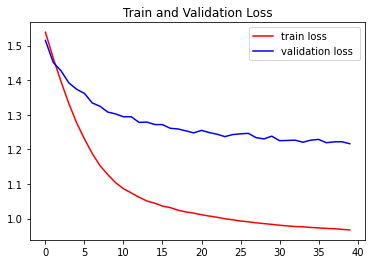

In [75]:
import matplotlib.pyplot as plt
plt.plot(train_loss_trend,label='train loss',color="red")
plt.plot(valid_loss_trend,label='validation loss ',color="blue")
plt.title("Train and Validation Loss")
plt.legend()
plt.show()

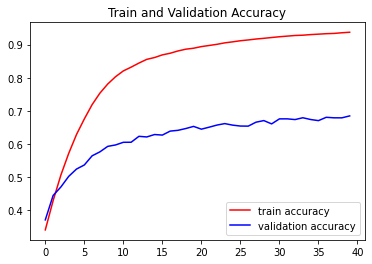

In [76]:
plt.plot(train_acc_trend,label='train accuracy',color="red")
plt.plot(valid_acc_trend,label='validation accuracy',color="blue")
plt.title("Train and Validation Accuracy")
plt.legend()
plt.show()


###Model Testing###

**Let's Test the Model**

The model will be evaluated with the test data that was not used for training.


In [77]:
example_test=[data.Example.fromlist([data_dict['test'].text[i],data_dict['test'].label[i]],fields) for i in range (data_dict['test'].shape[0])]
test = data.Dataset(example_test, fields)
test_iterator=data.BucketIterator(test,batch_size=32,
                                  sort_key = lambda x: len(x.text),
                                  sort_within_batch=True,device=device)

In [78]:
model.load_state_dict(torch.load(model_path))
test_loss, test_acc = evaluate(model, test_iterator, criterion)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 1.223 | Test Acc: 67.61%


###Predict Sentiment###
The sentiment is predicted on unseen data, which was never part of the dev, train, test sets. Let's see how the model fares.

In [79]:
model.load_state_dict(torch.load(model_path));
model.eval();
tokenizer_file = open(tokenizer_path, 'rb')
tokenizer = pickle.load(tokenizer_file)

#inference 

import spacy
# load trf instead of base 'en' for greater accuracy
nlp = spacy.load('en') 


def predict_sentiment(text):
    #very negative to very positive (- -, -, 0, +, ++)
    #Labels :  defaultdict(None, {3: 0, 1: 1, 2: 2, 4: 3, 0: 4})
    
    categories = {3: "very negative", 1:"negative", 2:"Neutral",4:"positive",0:"very positive"}
    
    # tokenize the text 
    tokenized = [tok.text for tok in nlp.tokenizer(text)] 
    # convert to integer sequence using predefined tokenizer dictionary
    indexed = [tokenizer[t] for t in tokenized]        
    # compute no. of words        
    length = [len(indexed)]
    # convert to tensor                                    
    tensor = torch.LongTensor(indexed).to(device)   
    # reshape in form of batch, no. of words           
    tensor = tensor.unsqueeze(1).T  
    # convert to tensor                          
    length_tensor = torch.LongTensor(length)
    # Get the model prediction                  
    prediction = model(tensor, length_tensor)

    _, pred = torch.max(prediction, 1) 
    
    return categories[pred.item()]

In [80]:
# review of mission impossible 5
predict_sentiment("Make no mistake, this predictable movie is clearly part of the Mission: Impossible franchise -- by which we mean it checks off all the usual boxes.")

'negative'

In [81]:
# review of minari
predict_sentiment("Minari is deeply rooted in the earth, a wellspring of both hope and pain, of boundless promise and terrifying disaster.")

'very negative'

In [82]:
# review of godzilla vs kong
predict_sentiment("In a patchwork production full of bad ideas poorly executed, Jia also embodies the story’s only good idea.")

'very negative'

In [83]:
# review of lunch box
predict_sentiment("Irrfan leads the way, underplayed, yet lasting, like a cardamom between your lips.")

'negative'

In [84]:
# review of avengers endgame
predict_sentiment("The Russo brothers' poignant, powerful finale more than lives up to the hype: It's a thrilling conclusion and a deeply emotional exploration of loss and love, duty and honor, friendship and family.")

'very negative'

In [85]:
# review of godfather
predict_sentiment("With performances, style and substance to savour, this shows how it is possible to smash box office records without being mindless.")

'positive'

In [86]:
# review of saving private ryan
predict_sentiment("Uncompromising, powerful war movie that does not pull any punches. Pefectly balances the inhumanity of war and the humanity of its protagonists. Devastating and essential viewing.")

'very negative'